In [3]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
plt.style.use('seaborn')
sys.path.append(os.path.abspath('C:\\Courses\\COMP 767\\Project\\flow'))
sys.path.append(os.path.abspath('C:\\Courses\\COMP 767\\Project\\flow\\flow\\visualize'))
from plot_ray_results import plot_progress

PPO 10run

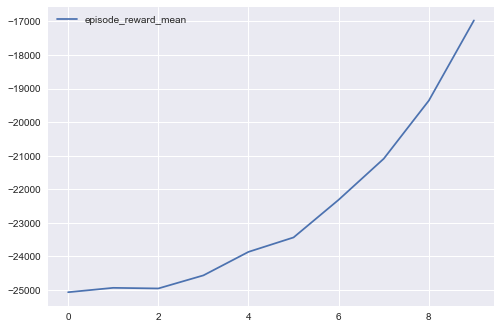

In [9]:
plot_progress('C:\\Courses\\Courses\\COMP 767\\Project\\flow\\project_ma\\data\\PPO_MultiTrafficLightGridPOEnv-v0_0_2020-03-24_14-21-24u46752ki\\progress.csv',['episode_reward_mean'])

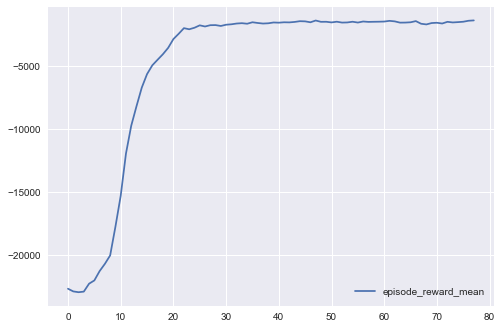

In [10]:
plot_progress('C:\\Courses\\Courses\\COMP 767\\Project\\flow\\project_ma\\data\\PPO_MultiTrafficLightGridPOEnv-v0_0_2020-03-25_04-17-38j7azi3fx\\progress.csv',['episode_reward_mean'])

A3C 100run

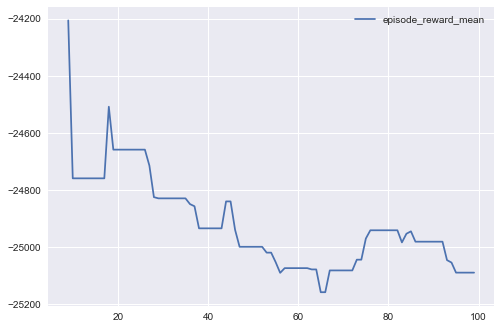

In [11]:
plot_progress('C:\\Courses\\Courses\\COMP 767\\Project\\flow\\project_ma\\data\\A3C_MultiTrafficLightGridPOEnv-v0_0_2020-03-25_00-00-47l7mvy15i\\progress.csv',['episode_reward_mean'])

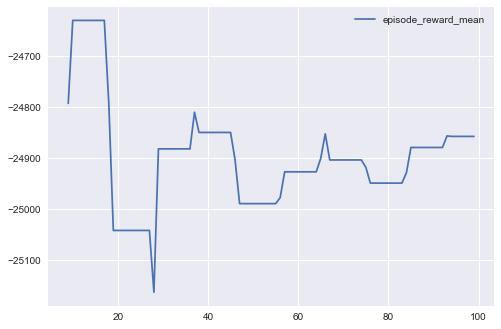

In [12]:

plot_progress('C:\\Courses\\Courses\\COMP 767\\Project\\flow\\project_ma\\data\\A3C_MultiTrafficLightGridPOEnv-v0_0_2020-03-25_10-32-11p7kk288j\\progress.csv',['episode_reward_mean'])

A3C 1000 run

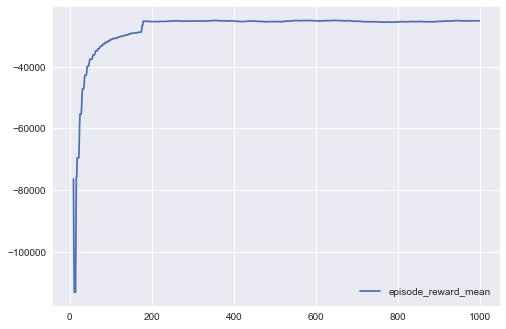

In [13]:
plot_progress('C:\\Courses\\Courses\\COMP 767\\Project\\flow\\project_ma\\data\\A3C_MultiTrafficLightGridPOEnv-v0_0_2020-03-25_14-30-35xc1c6a5z\\progress.csv',['episode_reward_mean'])

PG

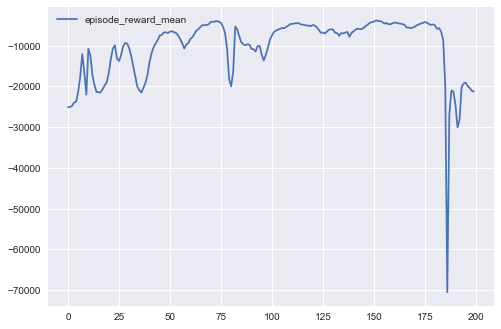

In [14]:
plot_progress('C:\\Courses\\Courses\\COMP 767\\Project\\flow\\project_ma\\data\\PG_MultiTrafficLightGridPOEnv-v0_0_2020-03-27_12-09-39i6y5ijt5\\progress.csv',['episode_reward_mean'])

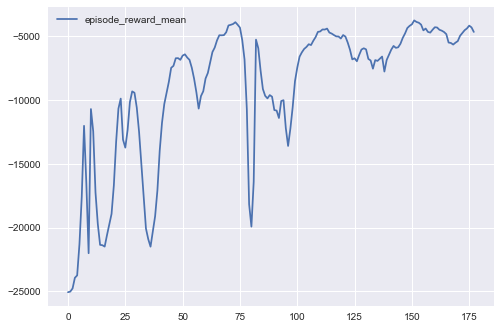

In [15]:
plot_progress('C:\\Courses\\Courses\\COMP 767\\Project\\flow\\project_ma\\data\\PG_MultiTrafficLightGridPOEnv-v0_0_2020-03-27_12-09-39i6y5ijt5\\progress_truncated.csv',['episode_reward_mean'])

offramp150_pos300

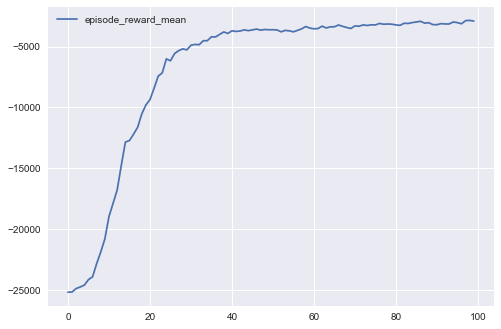

In [16]:
plot_progress('C:\\Courses\\Courses\\COMP 767\\Project\\flow\\project_ma\\data\\offramp_multiagent_ramp100_pos300\\PPO_MultiTrafficLightGridPOEnv-v0_0_2020-03-31_17-49-27qk6o3vh6\\progress.csv',['episode_reward_mean'])

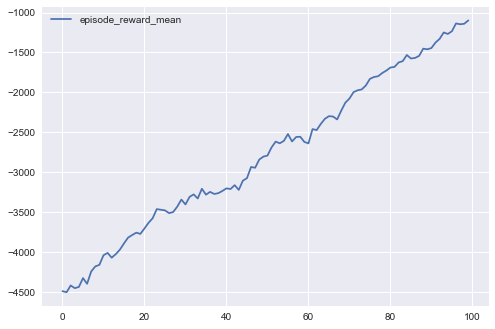

In [85]:
plot_progress('C:\\Courses\\Courses\\COMP 767\\Project\\flow\\rl_attack\\data\\progress.csv',['episode_reward_mean'])

# For research progess plotting

In [8]:
results = pd.read_excel('results.xlsx')
#rewards = pd.read_excel('reward.xlsx')
rewards = pd.read_csv('reward.csv')

In [5]:
# Average static and actuated mean reward
r_static =[
    results.avg_return[results.index[results['file']=='ramp_static_0'][0]],
    results.avg_return[results.index[results['file']=='ramp_static_1'][0]],
    results.avg_return[results.index[results['file']=='ramp_static_2'][0]],
    results.avg_return[results.index[results['file']=='ramp_static_3'][0]],
    results.avg_return[results.index[results['file']=='ramp_static_4'][0]],
]
r_actuated = [
    results.avg_return[results.index[results['file']=='ramp_actuated_0'][0]],
    results.avg_return[results.index[results['file']=='ramp_actuated_1'][0]],
    results.avg_return[results.index[results['file']=='ramp_actuated_2'][0]],
    results.avg_return[results.index[results['file']=='ramp_actuated_3'][0]],
    results.avg_return[results.index[results['file']=='ramp_actuated_4'][0]],
]

Firstly, analyze the influence of shared and non-shared policies

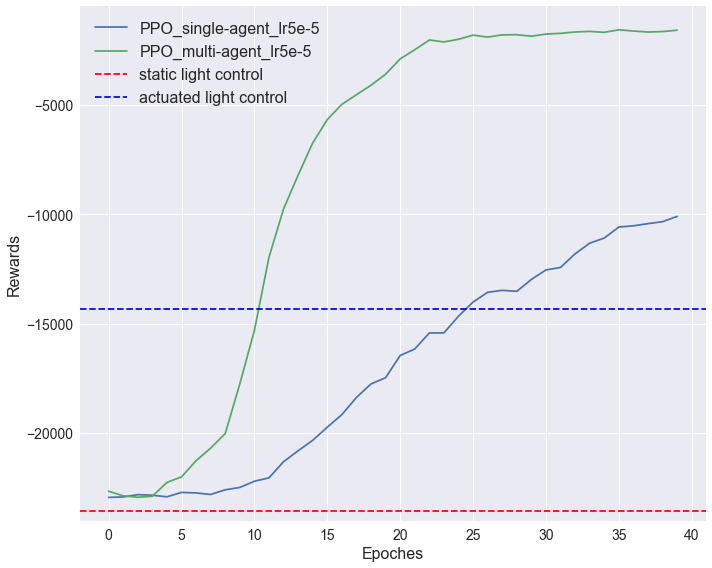

In [173]:
plt.figure(figsize=(10,8))
plt.plot(rewards['ramp_PPO_sa_lr5e-5'][:40],label='PPO_single-agent_lr5e-5')
plt.plot(rewards['ramp_PPO_ma_lr5e-5'][:40],label='PPO_multi-agent_lr5e-5')
plt.axhline(y=np.mean(r_static), color='r', linestyle='--',label='static light control')
plt.axhline(y=np.mean(r_actuated), color='b', linestyle='--',label='actuated light control')
plt.legend(fontsize=16)
plt.xlabel('Epoches',fontsize=16)
plt.ylabel('Rewards',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('fig/ppo_sa_vs_ma.png')

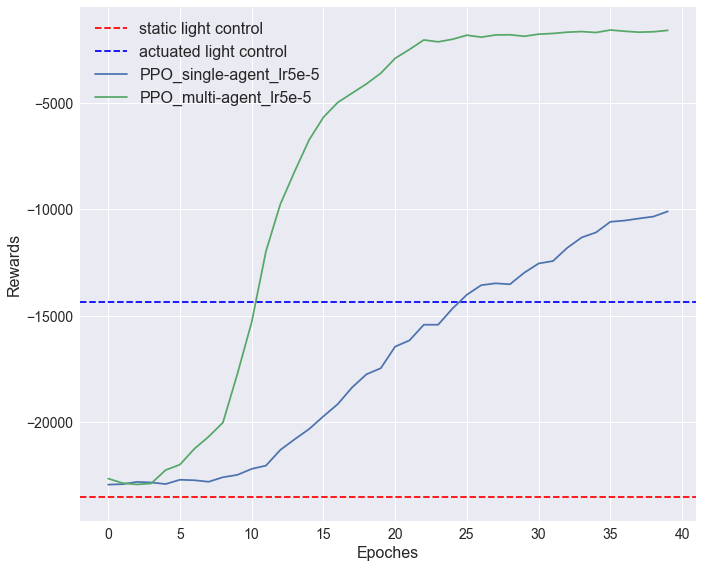

In [180]:
fig,ax = plt.subplots(figsize=(10,8))

x = [i for i in range(40)]
y=np.array(rewards['ramp_PPO_sa_lr5e-5'][:40])
z=np.array(rewards['ramp_PPO_ma_lr5e-5'][:40])

plt.axhline(y=np.mean(r_static), color='r', linestyle='--',label='static light control')
plt.axhline(y=np.mean(r_actuated), color='b', linestyle='--',label='actuated light control')
plt.legend(fontsize=16,loc='upper left')
plt.xlabel('Epoches',fontsize=16)
plt.ylabel('Rewards',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()


line1,=ax.plot(x,y,label='PPO_single-agent_lr5e-5')
line2,=ax.plot(x,z,label='PPO_multi-agent_lr5e-5')


def animate(i,x,y,z,line1,line2):
    line1.set_data(x[:i],y[:i])
    line2.set_data(x[:i],z[:i])
    return [line1,line2]

anim = animation.FuncAnimation(fig, animate, frames=400, interval=40,fargs=[x,y,z,line1,line2], blit=True)
plt.legend(fontsize=16,loc='upper left')

anim.save('PPO_sa_ma.gif', writer='pillow')
plt.show()

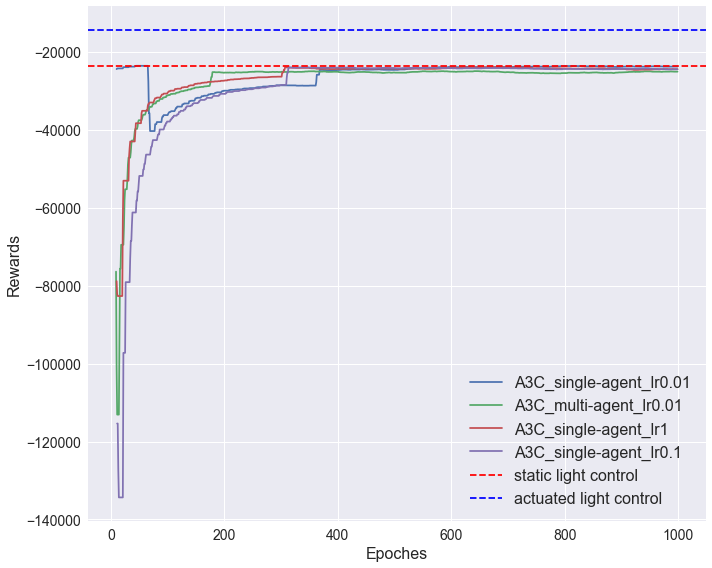

In [16]:
plt.figure(figsize=(10,8))
plt.plot(rewards['ramp_A3C_sa_lr0.01'],label='A3C_single-agent_lr0.01')
plt.plot(rewards['ramp_A3C_ma_lr0.01'],label='A3C_multi-agent_lr0.01')
plt.plot(rewards['ramp_A3C_sa_lr1'],label='A3C_single-agent_lr1')
plt.plot(rewards['ramp_A3C_sa_lr0.1'],label='A3C_single-agent_lr0.1')

plt.axhline(y=np.mean(r_static), color='r', linestyle='--',label='static light control')
plt.axhline(y=np.mean(r_actuated), color='b', linestyle='--',label='actuated light control')


plt.legend(fontsize=16)
plt.xlabel('Epoches',fontsize=16)
plt.ylabel('Rewards',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('fig/a3c_sa_vs_ma.png')
plt.show()

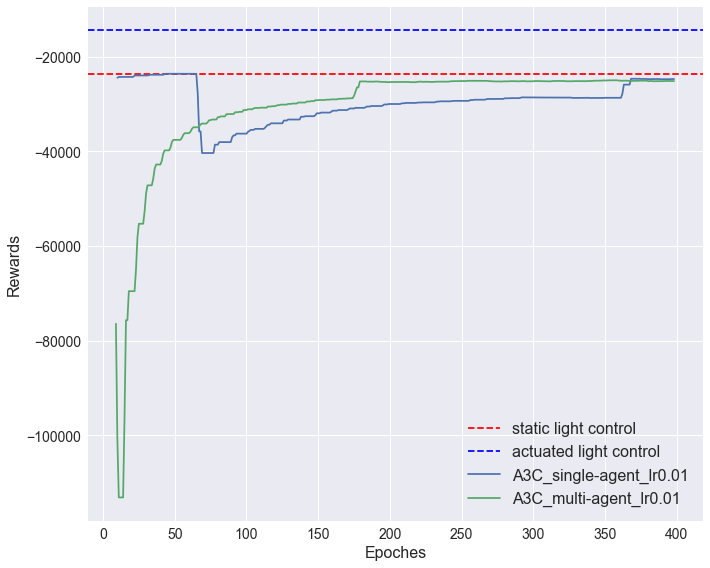

In [176]:
fig,ax = plt.subplots(figsize=(10,8))

x = [i for i in range(400)]
y=np.array(rewards['ramp_A3C_sa_lr0.01'][:400])
z=np.array(rewards['ramp_A3C_ma_lr0.01'][:400])

plt.axhline(y=np.mean(r_static), color='r', linestyle='--',label='static light control')
plt.axhline(y=np.mean(r_actuated), color='b', linestyle='--',label='actuated light control')
plt.legend(fontsize=16,loc='lower right')
plt.xlabel('Epoches',fontsize=16)
plt.ylabel('Rewards',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()


line1,=ax.plot(x,y,label='A3C_single-agent_lr0.01')
line2,=ax.plot(x,z,label='A3C_multi-agent_lr0.01')


def animate(i,x,y,z,line1,line2):
    line1.set_data(x[:i],y[:i])
    line2.set_data(x[:i],z[:i])
    return [line1,line2]

anim = animation.FuncAnimation(fig, animate, frames=400, interval=40,fargs=[x,y,z,line1,line2], blit=True)
plt.legend(fontsize=16,loc='lower right')

anim.save('A3C_sa_ma.gif', writer='pillow')
plt.show()

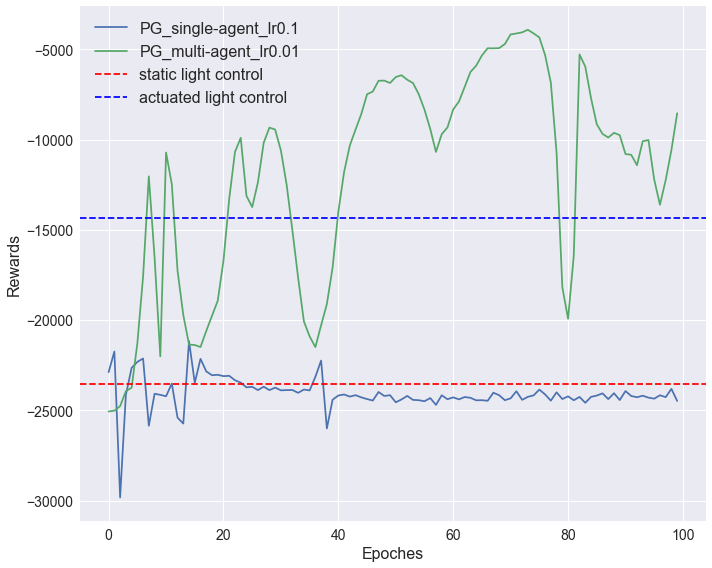

In [12]:
plt.figure(figsize=(10,8))
plt.plot(rewards['ramp_PG_sa_lr0.1'][:100],label='PG_single-agent_lr0.1')
plt.plot(rewards['ramp_PG_ma_lr0.01'][:100],label='PG_multi-agent_lr0.01')
plt.axhline(y=np.mean(r_static), color='r', linestyle='--',label='static light control')
plt.axhline(y=np.mean(r_actuated), color='b', linestyle='--',label='actuated light control')


plt.legend(fontsize=16)
plt.xlabel('Epoches',fontsize=16)
plt.ylabel('Rewards',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('fig/pg_sa_vs_ma.png')
plt.show()

It can be found that shared PPO has better performance than non-shared one. What if we compare different algorithms and environments together?

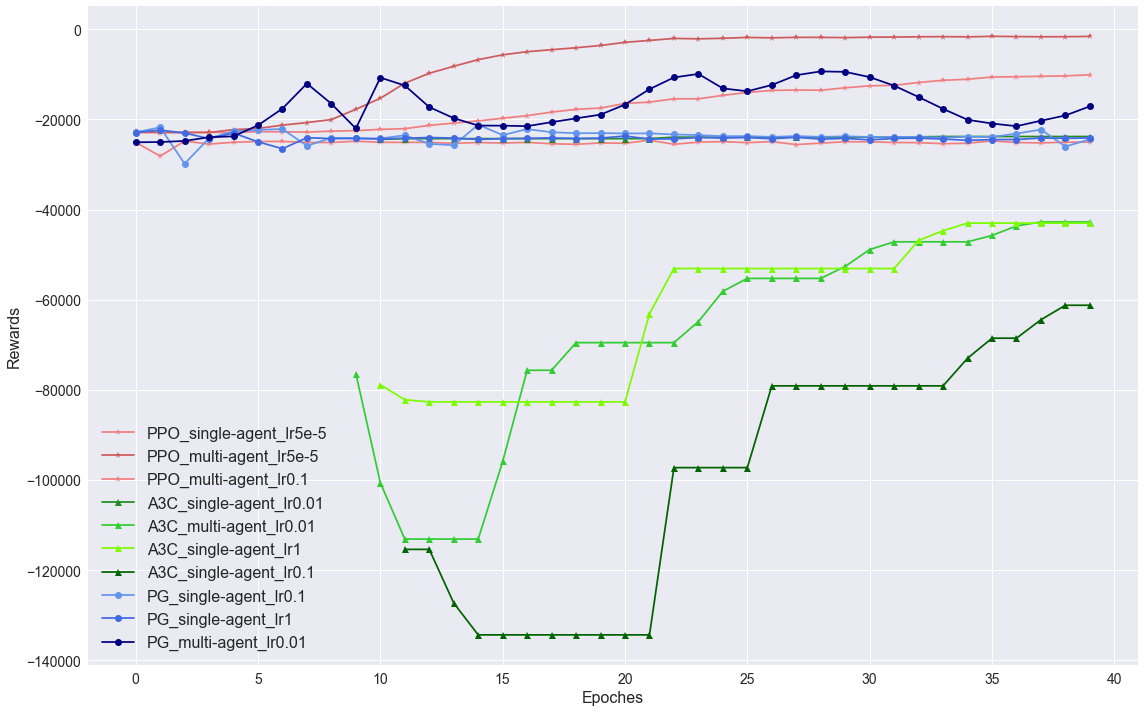

In [20]:
plt.figure(figsize=(16,10))
plt.plot(rewards['ramp_PPO_sa_lr5e-5'][:40],label='PPO_single-agent_lr5e-5',c='lightcoral',marker='*')
plt.plot(rewards['ramp_PPO_ma_lr5e-5'][:40],label='PPO_multi-agent_lr5e-5',c='indianred',marker='*')
plt.plot(rewards['ramp_PPO_ma_lr0.1'][:40],label='PPO_multi-agent_lr0.1',c='lightcoral',marker='*')

plt.plot(rewards['ramp_A3C_sa_lr0.01'][:40],label='A3C_single-agent_lr0.01',c='forestgreen',marker='^')
plt.plot(rewards['ramp_A3C_ma_lr0.01'][:40],label='A3C_multi-agent_lr0.01',c='limegreen',marker='^')
plt.plot(rewards['ramp_A3C_sa_lr1'][:40],label='A3C_single-agent_lr1',c='lawngreen',marker='^')
plt.plot(rewards['ramp_A3C_sa_lr0.1'][:40],label='A3C_single-agent_lr0.1',c='darkgreen',marker='^')

plt.plot(rewards['ramp_PG_sa_lr0.1'][:40],label='PG_single-agent_lr0.1',c='cornflowerblue',marker='o')
plt.plot(rewards['ramp_PG_sa_lr1'][:40],label='PG_single-agent_lr1',c='royalblue',marker='o')
plt.plot(rewards['ramp_PG_ma_lr0.01'][:40],label='PG_multi-agent_lr0.01',c='navy',marker='o')


plt.legend(fontsize=16)
plt.xlabel('Epoches',fontsize=16)
plt.ylabel('Rewards',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('fig/all_algorithms_compare_first40.png')
plt.show()

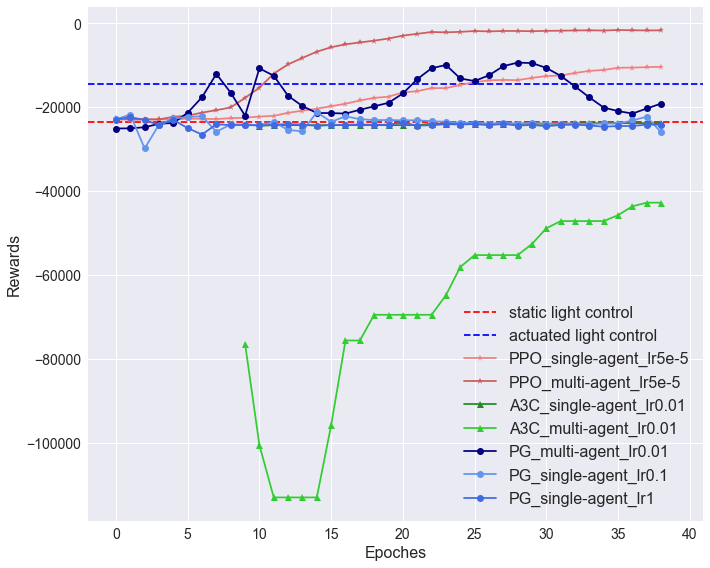

In [178]:
fig,ax = plt.subplots(figsize=(10,8))

x = [i for i in range(40)]

y1=np.array(rewards['ramp_PPO_sa_lr5e-5'][:40])
y2=np.array(rewards['ramp_PPO_ma_lr5e-5'][:40])
y3=np.array(rewards['ramp_A3C_sa_lr0.01'][:40])
y4=np.array(rewards['ramp_A3C_ma_lr0.01'][:40])
y7=np.array(rewards['ramp_PG_ma_lr0.01'][:40])
y5=np.array(rewards['ramp_PG_sa_lr0.1'][:40])
y6=np.array(rewards['ramp_PG_sa_lr1'][:40])


plt.axhline(y=np.mean(r_static), color='r', linestyle='--',label='static light control')
plt.axhline(y=np.mean(r_actuated), color='b', linestyle='--',label='actuated light control')
plt.legend(fontsize=16,loc='lower right')
plt.xlabel('Epoches',fontsize=16)
plt.ylabel('Rewards',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

line1,=ax.plot(x,y1,label='PPO_single-agent_lr5e-5',c='lightcoral',marker='*')
line2,=ax.plot(x,y2,label='PPO_multi-agent_lr5e-5',c='indianred',marker='*')
line3,=ax.plot(x,y3,label='A3C_single-agent_lr0.01',c='forestgreen',marker='^')
line4,=ax.plot(x,y4,label='A3C_multi-agent_lr0.01',c='limegreen',marker='^')
line7,=ax.plot(x,y7,label='PG_multi-agent_lr0.01',c='navy',marker='o')
line5,=ax.plot(x,y5,label='PG_single-agent_lr0.1',c='cornflowerblue',marker='o')
line6,=ax.plot(x,y6,label='PG_single-agent_lr1',c='royalblue',marker='o')


def animate(i,x,y1,y2,y3,y4,y5,y6,y7,line1,line2,line3,line4,line5,line6,line7):
    line1.set_data(x[:i],y1[:i])
    line2.set_data(x[:i],y2[:i])
    line3.set_data(x[:i],y3[:i])
    line4.set_data(x[:i],y4[:i])
    line5.set_data(x[:i],y5[:i])
    line6.set_data(x[:i],y6[:i])
    line7.set_data(x[:i],y7[:i])
    return [line1,line2,line3,line4,line5,line6,line7]

anim = animation.FuncAnimation(fig, animate, frames=40, interval=100,fargs=[x,y1,y2,y3,y4,y5,y6,y7,line1,line2,line3,line4,line5,line6,line7], blit=True)
plt.legend(fontsize=16,loc='lower right')

anim.save('all_algorithms_compare_first40.gif', writer='pillow')
plt.show()

Secondly, we compare the influence of offramp length, using the most well performed PPO_shared_lr5e-5. Our default scenario is offramp 250 and pos 300

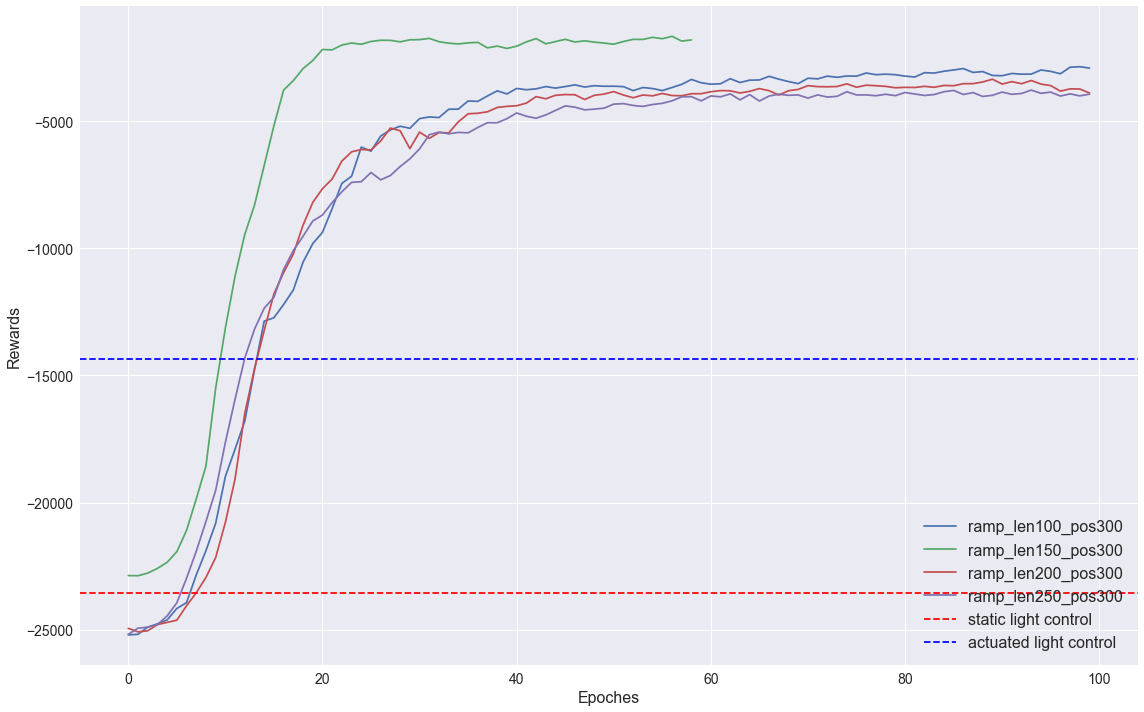

In [69]:
plt.figure(figsize=(16,10))
plt.plot(rewards['ramp_len100_pos300'],label='ramp_len100_pos300')
plt.plot(rewards['ramp_len150_pos300'],label='ramp_len150_pos300')
plt.plot(rewards['ramp_len200_pos300'],label='ramp_len200_pos300')
plt.plot(rewards['ramp_len250_pos300'],label='ramp_len250_pos300')
plt.axhline(y=np.mean(r_static), color='r', linestyle='--',label='static light control')
plt.axhline(y=np.mean(r_actuated), color='b', linestyle='--',label='actuated light control')

plt.legend(fontsize=16)
plt.xlabel('Epoches',fontsize=16)
plt.ylabel('Rewards',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('fig/offramp_length_plot.png')

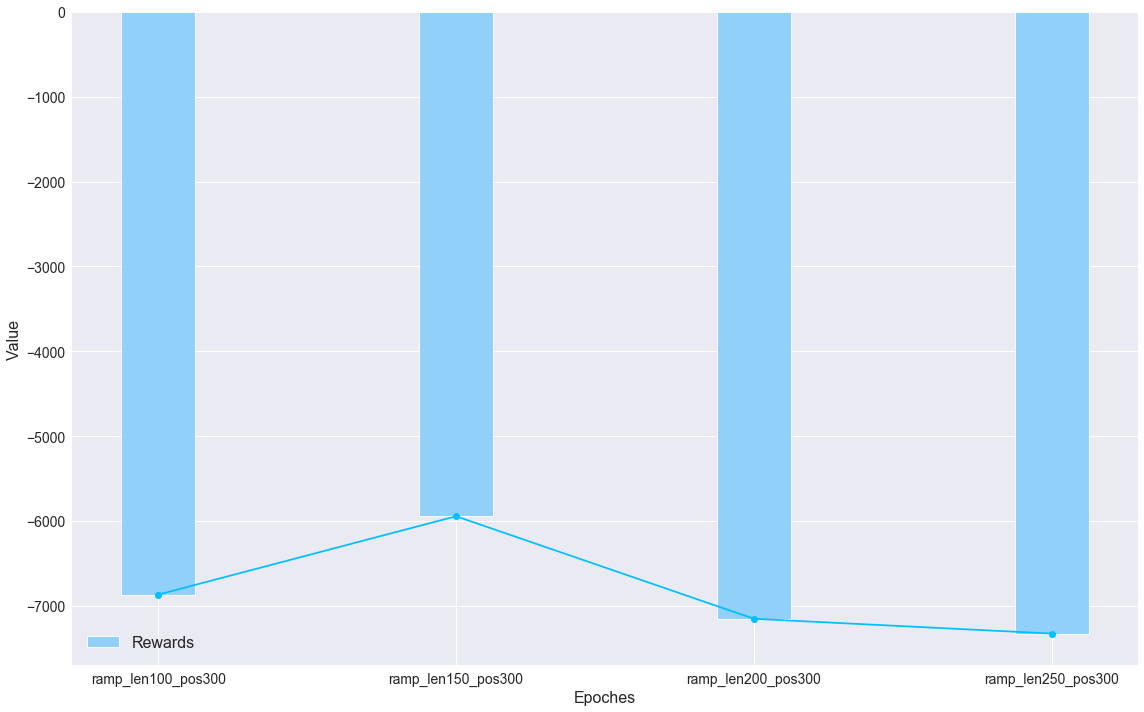

In [22]:
plt.figure(figsize=(16,10))
X = np.arange(4)
Y = [rewards['ramp_len100_pos300'].mean(),rewards['ramp_len150_pos300'].mean(),rewards['ramp_len200_pos300'].mean(),rewards['ramp_len250_pos300'].mean()]
'''Y2 = [
    results['efficiency'].loc[33],
    results['efficiency'].loc[35],
    results['efficiency'].loc[47],
    
]

'''

plt.bar(X,Y,alpha=0.9, width = 0.25, facecolor = 'lightskyblue', edgecolor = 'white', lw=1)
plt.plot(X,Y,c='deepskyblue',marker='o')

#plt.bar(np.arange(3)+0.25,Y2,alpha=0.9, width = 0.25, facecolor = 'limegreen', edgecolor = 'white', lw=1,label = 'Rewards')
#plt.plot(np.arange(3)+0.25,Y2,c='forestgreen',marker='o')

plt.legend(fontsize=16)
plt.xlabel('Epoches',fontsize=16)
plt.ylabel('Average rewards',fontsize=16)
plt.xticks(X,['ramp_len100_pos300','ramp_len150_pos300','ramp_len200_pos300','ramp_len250_pos300'],fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('fig/offramp_length_bar.png')

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))

x = [i for i in range(40)]

y1=np.array(rewards['ramp_PPO_sa_lr5e-5'][:40])
y2=np.array(rewards['ramp_PPO_ma_lr5e-5'][:40])
y3=np.array(rewards['ramp_A3C_sa_lr0.01'][:40])
y4=np.array(rewards['ramp_A3C_ma_lr0.01'][:40])
y7=np.array(rewards['ramp_PG_ma_lr0.01'][:40])
y5=np.array(rewards['ramp_PG_sa_lr0.1'][:40])
y6=np.array(rewards['ramp_PG_sa_lr1'][:40])


plt.axhline(y=np.mean(r_static), color='r', linestyle='--',label='static light control')
plt.axhline(y=np.mean(r_actuated), color='b', linestyle='--',label='actuated light control')
plt.legend(fontsize=16,loc='lower right')
plt.xlabel('Epoches',fontsize=16)
plt.ylabel('Rewards',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

line1,=ax.plot(x,y1,label='PPO_non-shared_lr5e-5',c='lightcoral',marker='*')
line2,=ax.plot(x,y2,label='PPO_shared_lr5e-5',c='indianred',marker='*')
line3,=ax.plot(x,y3,label='A3C_non-shared_lr0.01',c='forestgreen',marker='^')
line4,=ax.plot(x,y4,label='A3C_shared_lr0.01',c='limegreen',marker='^')
line7,=ax.plot(x,y7,label='PG_shared_lr0.01',c='navy',marker='o')
line5,=ax.plot(x,y5,label='PG_non-shared_lr0.1',c='cornflowerblue',marker='o')
line6,=ax.plot(x,y6,label='PG_non-shared_lr1',c='royalblue',marker='o')


def animate(i,x,y1,y2,y3,y4,y5,y6,y7,line1,line2,line3,line4,line5,line6,line7):
    line1.set_data(x[:i],y1[:i])
    line2.set_data(x[:i],y2[:i])
    line3.set_data(x[:i],y3[:i])
    line4.set_data(x[:i],y4[:i])
    line5.set_data(x[:i],y5[:i])
    line6.set_data(x[:i],y6[:i])
    line7.set_data(x[:i],y7[:i])
    return [line1,line2,line3,line4,line5,line6,line7]

anim = animation.FuncAnimation(fig, animate, frames=40, interval=100,fargs=[x,y1,y2,y3,y4,y5,y6,y7,line1,line2,line3,line4,line5,line6,line7], blit=True)
plt.legend(fontsize=16,loc='lower right')

anim.save('all_algorithms_compare_first40.gif', writer='pillow')
plt.show()

What if we change the position of the ramp?

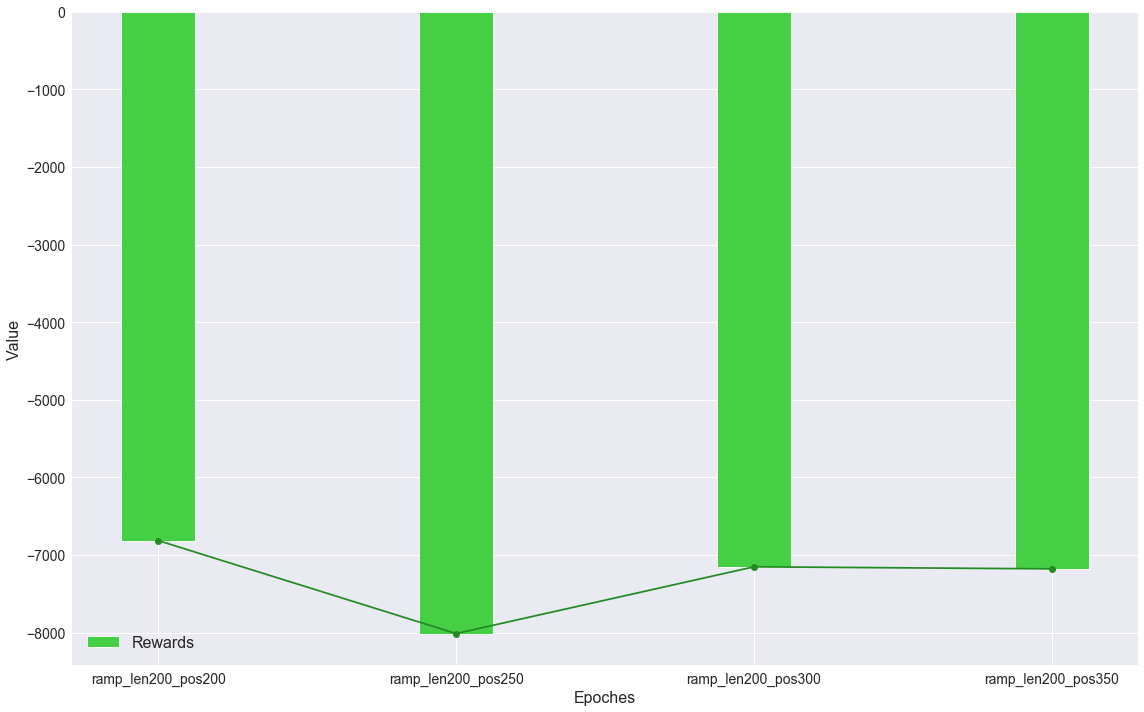

In [23]:
plt.figure(figsize=(16,10))
X = np.arange(4)
Y = [rewards['ramp_len200_pos200'].mean(),rewards['ramp_len200_pos250'].mean(),rewards['ramp_len200_pos300'].mean(),rewards['ramp_len200_pos350'].mean()]

plt.bar(X,Y,alpha=0.9, width = 0.25, facecolor = 'limegreen', edgecolor = 'white', lw=1,label = 'Average rewards')
plt.plot(X,Y,c='forestgreen',marker='o')

plt.legend(fontsize=16)
plt.xlabel('Epoches',fontsize=16)
plt.ylabel('Value',fontsize=16)
plt.xticks(X,['ramp_len200_pos200','ramp_len200_pos250','ramp_len200_pos300','ramp_len200_pos350'],fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('fig/offramp_position_bar.png')

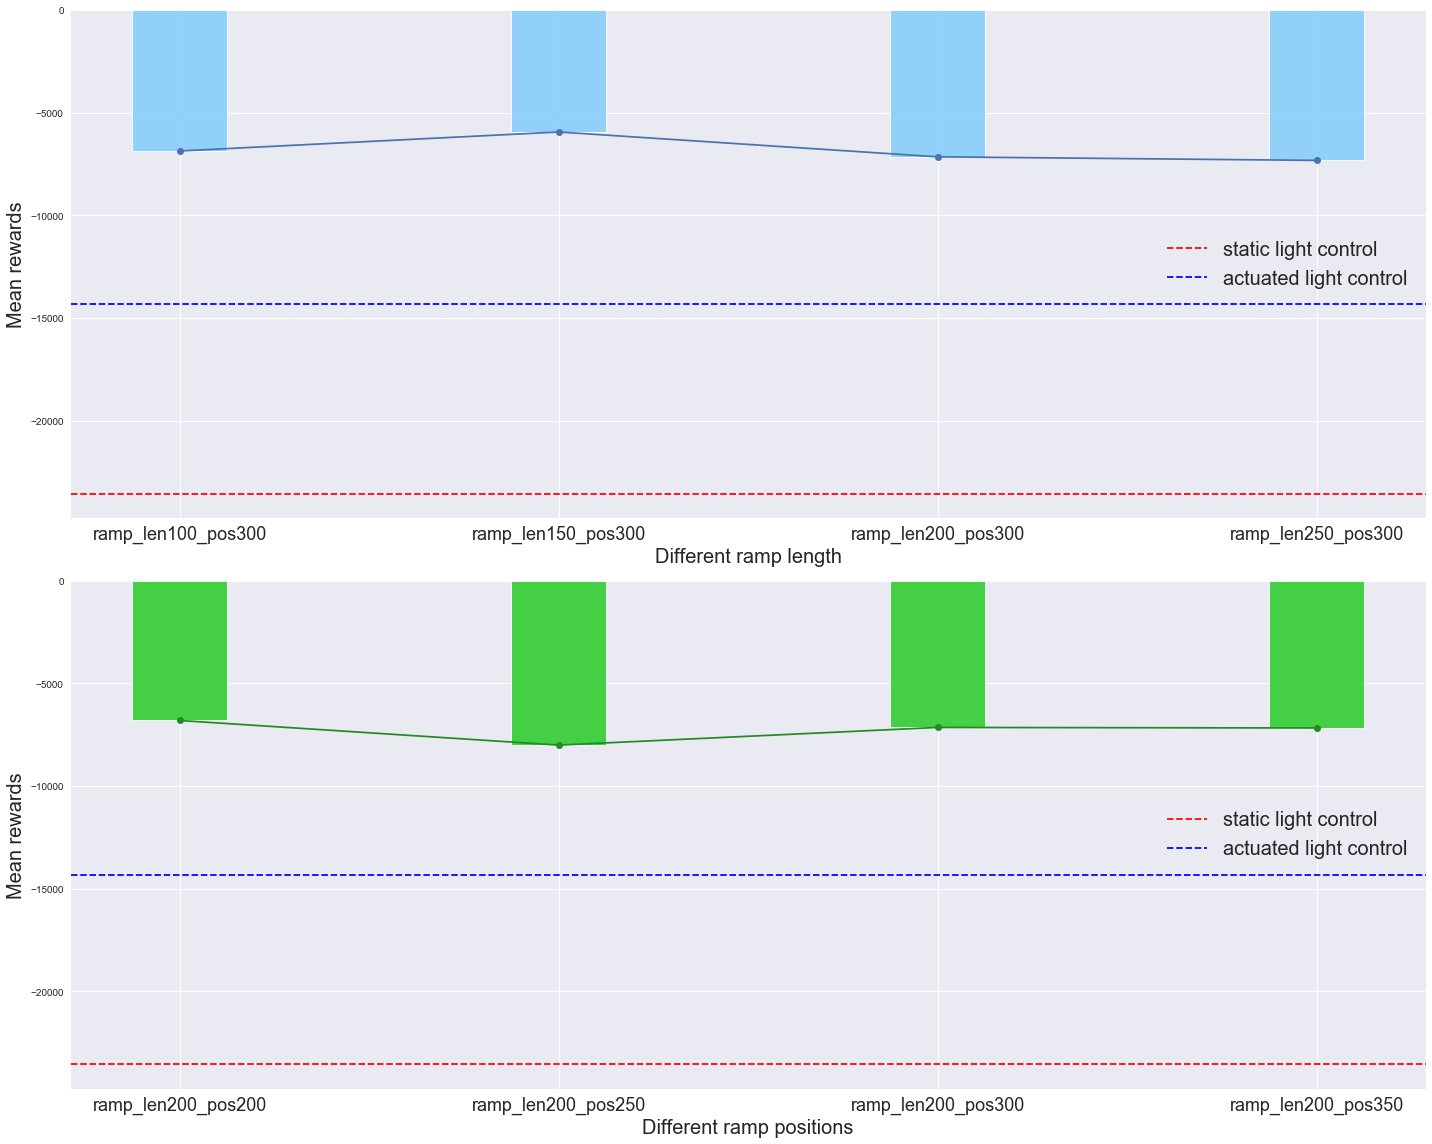

In [83]:
X = np.arange(4)
Y1 = [rewards['ramp_len100_pos300'].mean(),rewards['ramp_len150_pos300'].mean(),rewards['ramp_len200_pos300'].mean(),rewards['ramp_len250_pos300'].mean()]
Y2 = [rewards['ramp_len200_pos200'].mean(),rewards['ramp_len200_pos250'].mean(),rewards['ramp_len200_pos300'].mean(),rewards['ramp_len200_pos350'].mean()]


fig, (ax1, ax2) = plt.subplots(2,figsize=(20,16))

ax1.bar(X,Y1,alpha=0.9, width = 0.25,facecolor='lightskyblue'  ,edgecolor = 'white', lw=1)
ax1.plot(X,Y1,marker='o')

ax1.axhline(y = np.mean(r_static) , color='r', linestyle='--',label='static light control')
ax1.axhline(y = np.mean(r_actuated) , color='b', linestyle='--',label='actuated light control')

ax1.legend(fontsize=20)
ax1.set_xlabel('Different ramp length',fontsize=20)
ax1.set_ylabel('Mean rewards',fontsize=20)
ax1.set_xticks(X)
ax1.set_xticklabels(['ramp_len100_pos300','ramp_len150_pos300','ramp_len200_pos300','ramp_len250_pos300'],fontsize = 18)


ax2.bar(X,Y2,alpha=0.9, width = 0.25, facecolor='limegreen', edgecolor = 'white', lw=1)
ax2.plot(X,Y2,c='forestgreen',marker='o')

ax2.axhline(y = np.mean(r_static) , color='r', linestyle='--',label='static light control')
ax2.axhline(y = np.mean(r_actuated) , color='b', linestyle='--',label='actuated light control')

ax2.legend(fontsize=20)
ax2.set_xlabel('Different ramp positions',fontsize=20)
ax2.set_ylabel('Mean rewards',fontsize=20)
ax2.set_xticks(X)
ax2.set_xticklabels(['ramp_len200_pos200','ramp_len200_pos250','ramp_len200_pos300','ramp_len200_pos350'],fontsize =18)

plt.tight_layout()
plt.savefig('fig/len_pos_infrastructure.png')

There is an optimzal infrastructure position and offramp length for best traffic light control.What can we do with the safety issues? What will be the safety concerns if we change the infrastructure settings? Here we use emergency brake numbers as an important criterion.

In [161]:
d_static =[
    results.emer_brake[results.index[results['file']=='ramp_static_0'][0]],
    results.emer_brake[results.index[results['file']=='ramp_static_1'][0]],
    results.emer_brake[results.index[results['file']=='ramp_static_2'][0]],
    results.emer_brake[results.index[results['file']=='ramp_static_3'][0]],
    results.emer_brake[results.index[results['file']=='ramp_static_4'][0]],
]
d_actuated = [
    results.emer_brake[results.index[results['file']=='ramp_actuated_0'][0]],
    results.emer_brake[results.index[results['file']=='ramp_actuated_1'][0]],
    results.emer_brake[results.index[results['file']=='ramp_actuated_2'][0]],
    results.emer_brake[results.index[results['file']=='ramp_actuated_3'][0]],
    results.emer_brake[results.index[results['file']=='ramp_actuated_4'][0]],
]
d_100_300 = [
    results.emer_brake[results.index[results['file']=='ramp_len100_pos300_20'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len100_pos300_40'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len100_pos300_60'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len100_pos300_80'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len100_pos300_100'][0]],
]
d_150_300 = [
    results.emer_brake[results.index[results['file']=='ramp_len150_pos300_20'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len150_pos300_40'][0]],
]
d_200_200 = [
    results.emer_brake[results.index[results['file']=='ramp_len200_pos200_20'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len200_pos200_40'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len200_pos200_60'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len200_pos200_80'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len200_pos200_100'][0]],
]
d_200_250 = [
    results.emer_brake[results.index[results['file']=='ramp_len200_pos200_20'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len200_pos200_40'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len200_pos200_60'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len200_pos200_80'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len200_pos200_100'][0]],
    
]
d_200_300 = [
    results.emer_brake[results.index[results['file']=='ramp_len200_pos300_20'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len200_pos300_40'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len200_pos300_60'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len200_pos300_80'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len200_pos300_100'][0]],
]
d_200_350 =[
    results.emer_brake[results.index[results['file']=='ramp_len200_pos350_20'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len200_pos350_40'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len200_pos350_60'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len200_pos350_80'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len200_pos350_100'][0]],
]
d_250_300 = [
    results.emer_brake[results.index[results['file']=='ramp_len250_pos300_20'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len250_pos300_40'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len250_pos300_60'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len250_pos300_80'][0]],
    results.emer_brake[results.index[results['file']=='ramp_len250_pos300_100'][0]],
]
d_ramp = np.array([d_100_300,d_200_300,d_250_300])
d_pos = np.array([d_200_250,d_200_300,d_200_350])

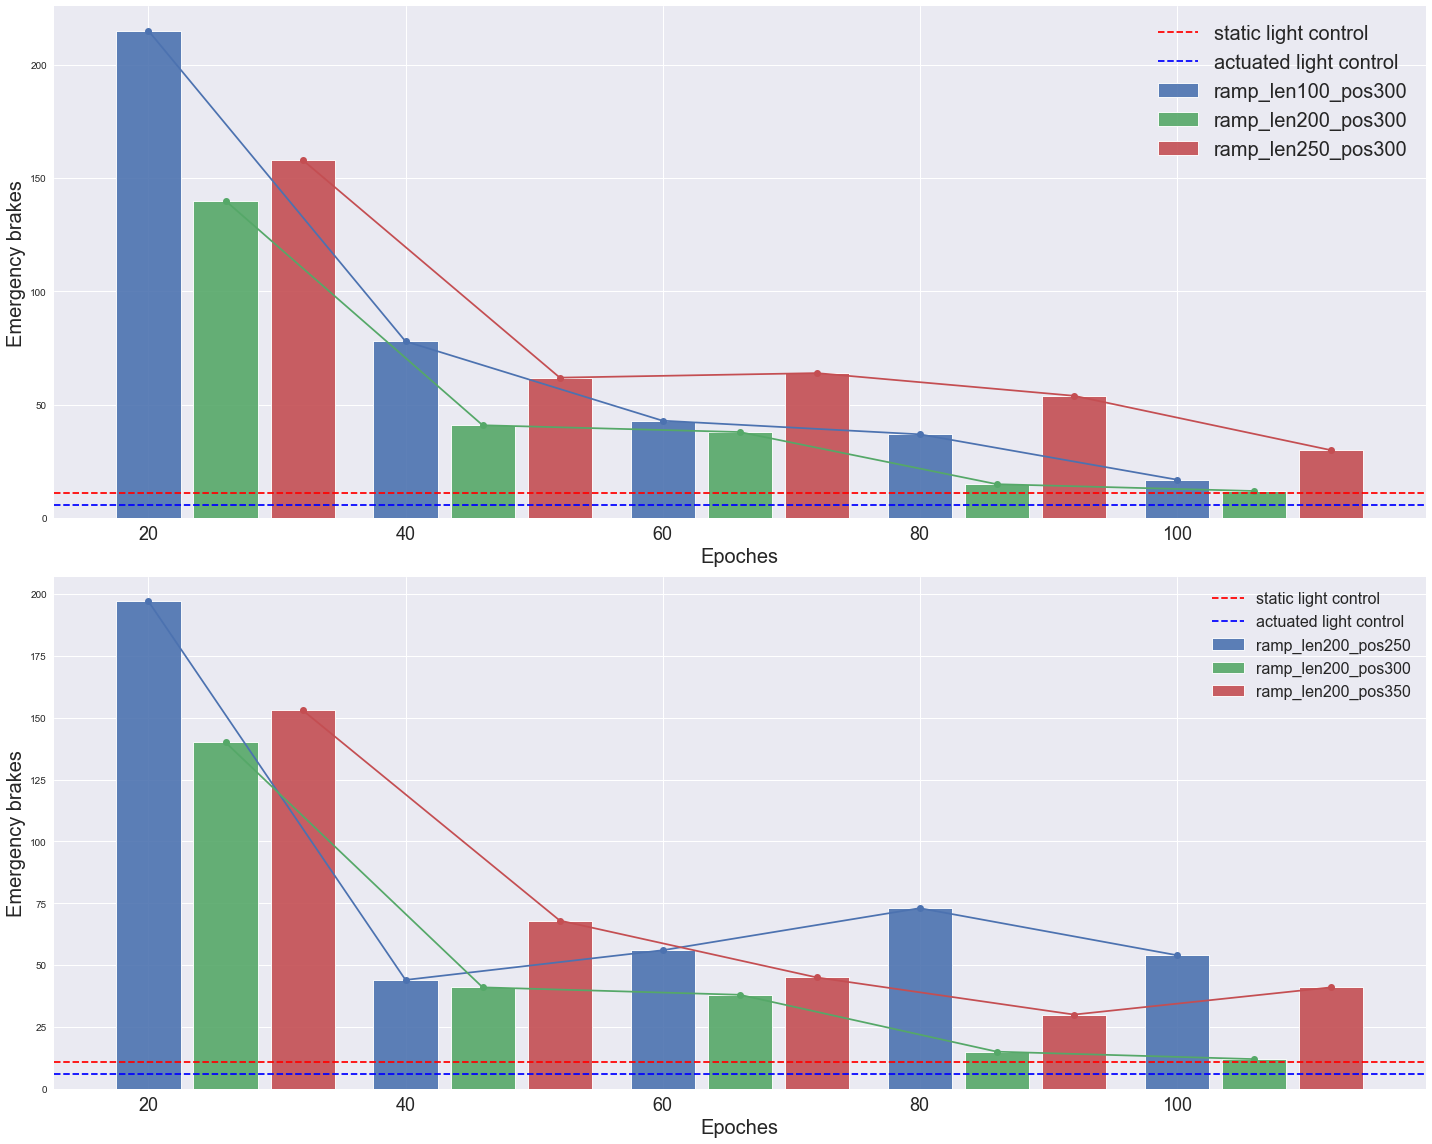

In [84]:
x = np.arange(5)


fig, (ax1, ax2) = plt.subplots(2,figsize=(20,16))

ax1.bar(x,d_ramp[0],alpha=0.9, width = 0.25,  edgecolor = 'white', lw=1,label = 'ramp_len100_pos300')
ax1.plot(x,d_ramp[0],marker='o')

#ax1.bar(np.arange(2)+0.3,d_ramp[1],alpha=0.9, width = 0.25,  edgecolor = 'white', lw=1,label = 'ramp_len150_pos300')
#ax1.plot(np.arange(2)+0.3,d_ramp[1],marker='o')

ax1.bar(x+0.3*1,d_ramp[2],alpha=0.9, width = 0.25,  edgecolor = 'white', lw=1,label = 'ramp_len200_pos300')
ax1.plot(x+0.3*1,d_ramp[2],marker='o')

ax1.bar(x+0.3*2,d_ramp[3],alpha=0.9, width = 0.25,  edgecolor = 'white', lw=1,label = 'ramp_len250_pos300')
ax1.plot(x+0.3*2,d_ramp[3],marker='o')

ax1.axhline(y = np.mean(d_static) , color='r', linestyle='--',label='static light control')
ax1.axhline(y = np.mean(d_actuated) , color='b', linestyle='--',label='actuated light control')

ax1.legend(fontsize=20)
ax1.set_xlabel('Epoches',fontsize=20)
ax1.set_ylabel('Emergency brakes',fontsize=20)
ax1.set_xticks(x)
ax1.set_xticklabels([20,40,60,80,100],fontsize = 18)


ax2.bar(x,d_pos[0],alpha=0.9, width = 0.25,  edgecolor = 'white', lw=1,label = 'ramp_len200_pos250')
ax2.plot(x,d_pos[0],marker='o')

ax2.bar(x+0.3*1,d_pos[1],alpha=0.9, width = 0.25,  edgecolor = 'white', lw=1,label = 'ramp_len200_pos300')
ax2.plot(x+0.3*1,d_pos[1],marker='o')

ax2.bar(x+0.3*2,d_pos[2],alpha=0.9, width = 0.25,  edgecolor = 'white', lw=1,label = 'ramp_len200_pos350')
ax2.plot(x+0.3*2,d_pos[2],marker='o')

ax2.axhline(y = np.mean(d_static) , color='r', linestyle='--',label='static light control')
ax2.axhline(y = np.mean(d_actuated) , color='b', linestyle='--',label='actuated light control')

ax2.legend(fontsize=16)
ax2.set_xlabel('Epoches',fontsize=20)
ax2.set_ylabel('Emergency brakes',fontsize=20)
ax2.set_xticks(x)
ax2.set_xticklabels([20,40,60,80,100],fontsize = 18)

plt.tight_layout()
plt.savefig('fig/safety_infrastructure.png')

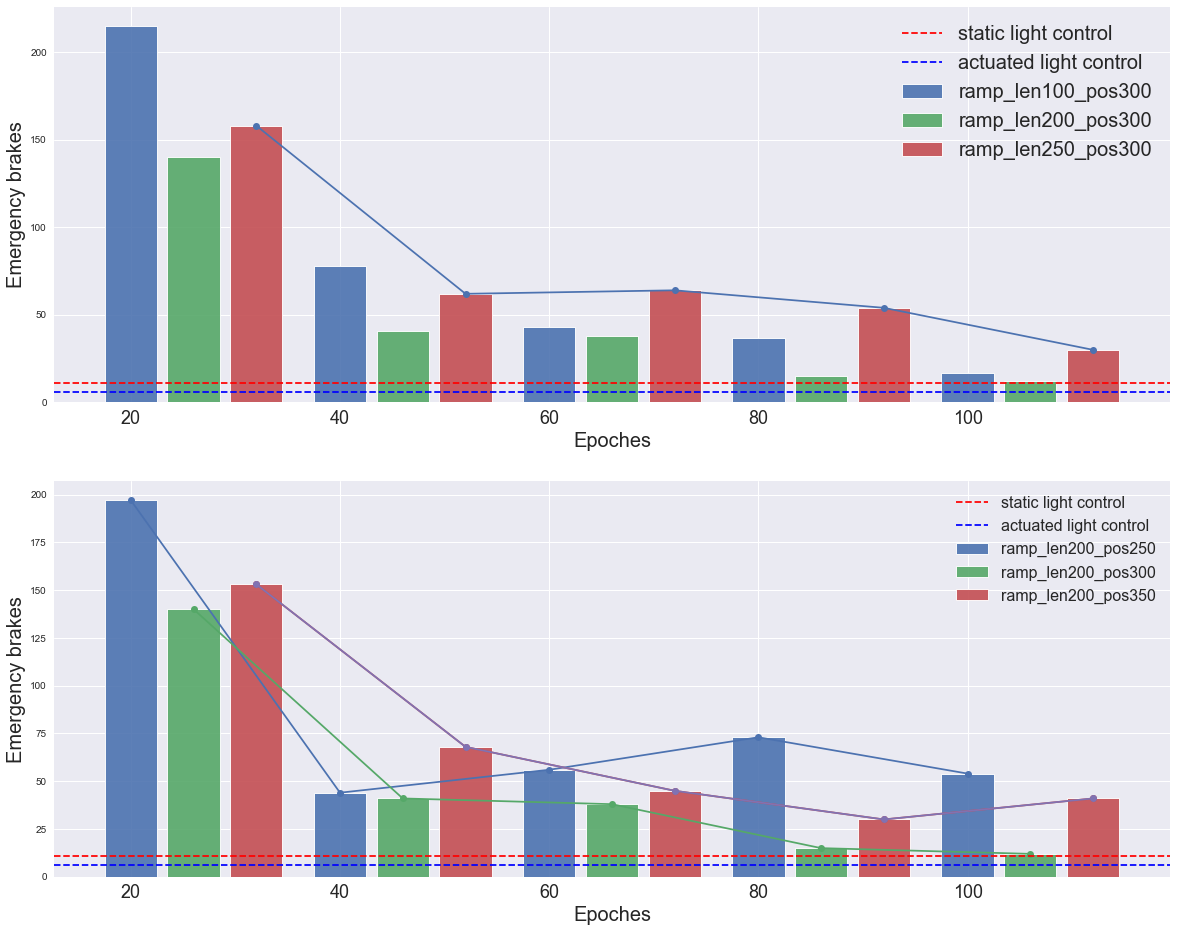

In [170]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(20,16))

x = np.arange(5)

ax1.bar(x,d_ramp[0],alpha=0.9, width = 0.25,  edgecolor = 'white', lw=1,label = 'ramp_len100_pos300')
ax1.bar(x+0.3*1,d_ramp[1],alpha=0.9, width = 0.25,  edgecolor = 'white', lw=1,label = 'ramp_len200_pos300')
ax1.bar(x+0.3*2,d_ramp[2],alpha=0.9, width = 0.25,  edgecolor = 'white', lw=1,label = 'ramp_len250_pos300')


ax1.axhline(y = np.mean(d_static) , color='r', linestyle='--',label='static light control')
ax1.axhline(y = np.mean(d_actuated) , color='b', linestyle='--',label='actuated light control')

ax1.legend(fontsize=20)
ax1.set_xlabel('Epoches',fontsize=20)
ax1.set_ylabel('Emergency brakes',fontsize=20)
ax1.set_xticks(x)
ax1.set_xticklabels([20,40,60,80,100],fontsize = 18)


ax2.bar(x,d_pos[0],alpha=0.9, width = 0.25,  edgecolor = 'white', lw=1,label = 'ramp_len200_pos250')
ax2.plot(x,d_pos[0],marker='o')

ax2.bar(x+0.3*1,d_pos[1],alpha=0.9, width = 0.25,  edgecolor = 'white', lw=1,label = 'ramp_len200_pos300')
ax2.plot(x+0.3*1,d_pos[1],marker='o')

ax2.bar(x+0.3*2,d_pos[2],alpha=0.9, width = 0.25,  edgecolor = 'white', lw=1,label = 'ramp_len200_pos350')
ax2.plot(x+0.3*2,d_pos[2],marker='o')

ax2.axhline(y = np.mean(d_static) , color='r', linestyle='--',label='static light control')
ax2.axhline(y = np.mean(d_actuated) , color='b', linestyle='--',label='actuated light control')

ax2.legend(fontsize=16)
ax2.set_xlabel('Epoches',fontsize=20)
ax2.set_ylabel('Emergency brakes',fontsize=20)
ax2.set_xticks(x)
ax2.set_xticklabels([20,40,60,80,100],fontsize = 18)

line1,=ax1.plot(x,d_ramp[0],marker='o')
line2,=ax2.plot(x,d_pos[0],marker='o')


def animate(i,x,d_ramp,d_pos,line1,line2):
    try:
        line1.set_data(x+0.3*i,d_ramp[i])
        line2.set_data(x+0.3*i,d_pos[i])
    except IndexError as e:
        pass
    return [line1,line2]

anim = animation.FuncAnimation(fig, animate, frames=3, interval=0.1,fargs=[x,d_ramp,d_pos,line1,line2], blit=True)

anim.save('safety_infrastructure_animation.gif', writer='pillow')
plt.show()